In [2]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

In [3]:
import pandas as pd #pandas for data import
import numpy as np # numpy for array manupulation
from sklearn import preprocessing, neighbors #just in case
from sklearn.model_selection import train_test_split #split our data into train and test chunks
from scipy.spatial import distance

In [4]:
import numpy as np

In [5]:
df_june = pd.read_csv('/home/mbogning/Documents/Master II/implementation/road_prediction/archive/june2016.csv') #importing the June data

In [6]:
df_june

,Id,Speed,TravelTime,Status,DataAsOf,linkId
0,1,21.13,201,0,6/2/2016 06:45:50,4616337
1,2,22.99,120,0,6/2/2016 06:45:50,4616325
2,3,22.99,287,0,6/2/2016 06:45:50,4616324
3,4,19.88,162,0,6/2/2016 06:45:50,4616338
4,106,21.13,109,0,6/2/2016 06:45:50,4616323
...,...,...,...,...,...,...
1048570,440,49.09,157,0,6/28/2016 21:42:45,4329483
1048571,441,59.03,134,0,6/28/2016 21:51:30,4616201
1048572,445,13.05,407,0,6/28/2016 21:50:56,4456494
1048573,448,42.25,464,0,6/28/2016 21:50:46,4620343


In [7]:
df_june.describe() #description of our data

,Id,Speed,TravelTime,Status,linkId
count,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06
mean,2.885558e+02,3.916513e+01,2.502879e+02,0.0,4.575884e+06
std,1.188822e+02,1.710281e+01,4.033850e+02,0.0,1.017225e+05
min,1.000000e+00,0.000000e+00,2.000000e+00,0.0,4.329472e+06
25%,1.840000e+02,2.485000e+01,9.200000e+01,0.0,4.616193e+06
50%,3.160000e+02,4.412000e+01,1.480000e+02,0.0,4.616241e+06
75%,3.980000e+02,5.282000e+01,2.690000e+02,0.0,4.616332e+06
max,4.530000e+02,1.864100e+02,1.205400e+04,0.0,4.763657e+06


In [8]:
df_june.drop(['Id'], axis=1, inplace=True) #droping id
df_june.drop(['Status'], axis=1, inplace=True) #droping Status

In [9]:
df_june.head(850)

,Speed,TravelTime,DataAsOf,linkId
0,21.13,201,6/2/2016 06:45:50,4616337
1,22.99,120,6/2/2016 06:45:50,4616325
2,22.99,287,6/2/2016 06:45:50,4616324
3,19.88,162,6/2/2016 06:45:50,4616338
4,21.13,109,6/2/2016 06:45:50,4616323
...,...,...,...,...
845,39.77,228,6/2/2016 07:15:49,4616355
846,11.18,328,6/2/2016 07:15:49,4616356
847,8.08,1449,6/2/2016 07:15:49,4616357
848,18.02,232,6/2/2016 07:15:49,4616310


In [10]:
time = pd.to_datetime(df_june.pop('DataAsOf'), format='%m/%d/%Y %H:%M:%S')

In [11]:
time

0         2016-06-02 06:45:50
1         2016-06-02 06:45:50
2         2016-06-02 06:45:50
3         2016-06-02 06:45:50
4         2016-06-02 06:45:50
                  ...        
1048570   2016-06-28 21:42:45
1048571   2016-06-28 21:51:30
1048572   2016-06-28 21:50:56
1048573   2016-06-28 21:50:46
1048574   2016-06-28 21:56:30
Name: DataAsOf, Length: 1048575, dtype: datetime64[ns]

In [12]:
timestamp_s = time.map(pd.Timestamp.timestamp)

In [13]:
Time = []
for i in time:
    Time.append(str(i.time()))

In [14]:
Time[0][:2]

new_dateTime = []
for i in Time:
    time_sec = int(i[:2])*3600 + int(i[3:5])*60 + int(i[-2:])
    new_dateTime.append(time_sec)

In [15]:
df_june['DataAsOf'] = new_dateTime

In [16]:
df_june

,Speed,TravelTime,linkId,DataAsOf
0,21.13,201,4616337,24350
1,22.99,120,4616325,24350
2,22.99,287,4616324,24350
3,19.88,162,4616338,24350
4,21.13,109,4616323,24350
...,...,...,...,...
1048570,49.09,157,4329483,78165
1048571,59.03,134,4616201,78690
1048572,13.05,407,4456494,78656
1048573,42.25,464,4620343,78646


In [17]:
data = np.array(df_june)
xtest = data[:20]
train = data[20:]

*<h3> <strong> Pearson Correlation Coefficient </strong> </h3>*

$$ r = \dfrac{\sum(X_i - X_m)(Y_i - Y_m)} {\sqrt{\sum(X_i - X_m)^2\sum(Y_i - Y_m)^2}}$$

*<h3> <strong> KNN </strong> </h3>*
$$ di = \sqrt{\sum Wi (V_i - v_ij)} $$

*<h3> <strong> Prediction algorithm </strong> </h3>*

<img src='Capture.PNG' alt='not suppoted'>


In [18]:
import scipy.spatial.distance


def corr(data1, data2):
    data1_mean = np.mean(data1)
    data2_mean = np.mean(data2)
    s_1 = 0
    for i in range(len(data1)):
        s_1 = s_1 + (data1[i] - data1_mean)*(data2[i] - data2_mean)
    s_2 = 0
    for i in range(len(data1)):
        s_2 = s_2 + (data1[i] - data1_mean)*(data1[i] - data1_mean)
    s_3 = 0
    for i in range(len(data1)):
        s_3 = s_3 + (data2[i] - data2_mean)*(data2[i] - data2_mean)
    s_3
    r = s_1/ np.sqrt(s_3*s_2)
    return r 

def knn(data, test, k=3):
    distance_list = []
    for features in data:
        #r,_ = pearsonr(features, test)
        r = corr(test,features)
        dist = np.sqrt( np.sum( r*np.square(test - features) ) ) 
        #dist = distance.euclidean(test[1:], features[1:], corr(test[1:],features[1:]))
        distance_list.append([dist, features[:1]])
    return sorted(distance_list)[:k]
def prediction(x_test, data):
    true = []
    pred = []
    result={ 't': true,
            'p': pred   
    }
    for i in x_test:
        
        r = knn(data, i, k=5)
        
        distances = [i[0] for i in r if i[0] !=0.0]
        #print(np.mean(distances))
        Sg = [i[1] for i in r if i[0] !=0.0]
        d_1 = [1/i for i in distances if i !=0.0]
        Sm =  np.dot(d_1/np.sum(d_1), Sg)
        result['p'].append(Sm)
        
    result['t'] = x_test[:,0]
    df = pd.DataFrame(data=result)
    #print(df.head(100))
    return df


In [19]:
t = [2.11300000e+01, 1.09000000e+02, 4.61632300e+06, 1.46484995e+09]
p = knn(train, t, k=8)
p


<ipython-input-18-ee1275291691>:25: RuntimeWarning: invalid value encountered in sqrt
  dist = np.sqrt( np.sum( r*np.square(test - features) ) )


[[nan, array([52.2])],
 [nan, array([24.23])],
 [nan, array([47.22])],
 [nan, array([50.95])],
 [nan, array([34.18])],
 [nan, array([21.13])],
 [nan, array([55.92])],
 [nan, array([14.91])]]

In [20]:
data = np.array(df_june)
xtest = data[:30]
train = data[30:]

In [21]:
xtest

array([[2.113000e+01, 2.010000e+02, 4.616337e+06, 2.435000e+04],
       [2.299000e+01, 1.200000e+02, 4.616325e+06, 2.435000e+04],
       [2.299000e+01, 2.870000e+02, 4.616324e+06, 2.435000e+04],
       [1.988000e+01, 1.620000e+02, 4.616338e+06, 2.435000e+04],
       [2.113000e+01, 1.090000e+02, 4.616323e+06, 2.435000e+04],
       [5.592000e+01, 1.370000e+02, 4.616281e+06, 2.435000e+04],
       [3.480000e+01, 1.820000e+02, 4.456502e+06, 2.426700e+04],
       [2.920000e+01, 2.200000e+02, 4.456501e+06, 2.426700e+04],
       [5.779000e+01, 6.900000e+01, 4.616246e+06, 2.435000e+04],
       [1.429000e+01, 5.210000e+02, 4.616260e+06, 2.435000e+04],
       [1.988000e+01, 1.630000e+02, 4.456479e+06, 2.426700e+04],
       [1.988000e+01, 3.890000e+02, 4.456478e+06, 2.426700e+04],
       [1.926000e+01, 1.340000e+02, 4.616342e+06, 2.435000e+04],
       [3.730000e+00, 3.236000e+03, 4.616257e+06, 2.435000e+04],
       [2.423000e+01, 2.990000e+02, 4.616339e+06, 2.435000e+04],
       [1.988000e+01, 4.6

In [22]:
pf = prediction(xtest, train)
pf
    

,t,p
0,21.13,[15.086056392718092]
1,22.99,[23.459736841208045]
2,22.99,[24.492694832379733]
3,19.88,[23.235194754783265]
4,21.13,[22.969892375171888]
5,55.92,[56.78808704914249]
6,34.80,[37.64792131846641]
7,29.20,[30.682754250051993]
8,57.79,[60.27111001527632]
9,14.29,[19.213954226692323]


In [23]:
xtest[:,0]

array([21.13, 22.99, 22.99, 19.88, 21.13, 55.92, 34.8 , 29.2 , 57.79,
       14.29, 19.88, 19.88, 19.26,  3.73, 24.23, 19.88, 21.13, 49.71,
       24.85, 41.01, 52.2 , 24.23, 47.22, 50.95, 34.18, 21.13, 55.92,
       14.91, 11.81, 26.1 ])

range(0, 30)


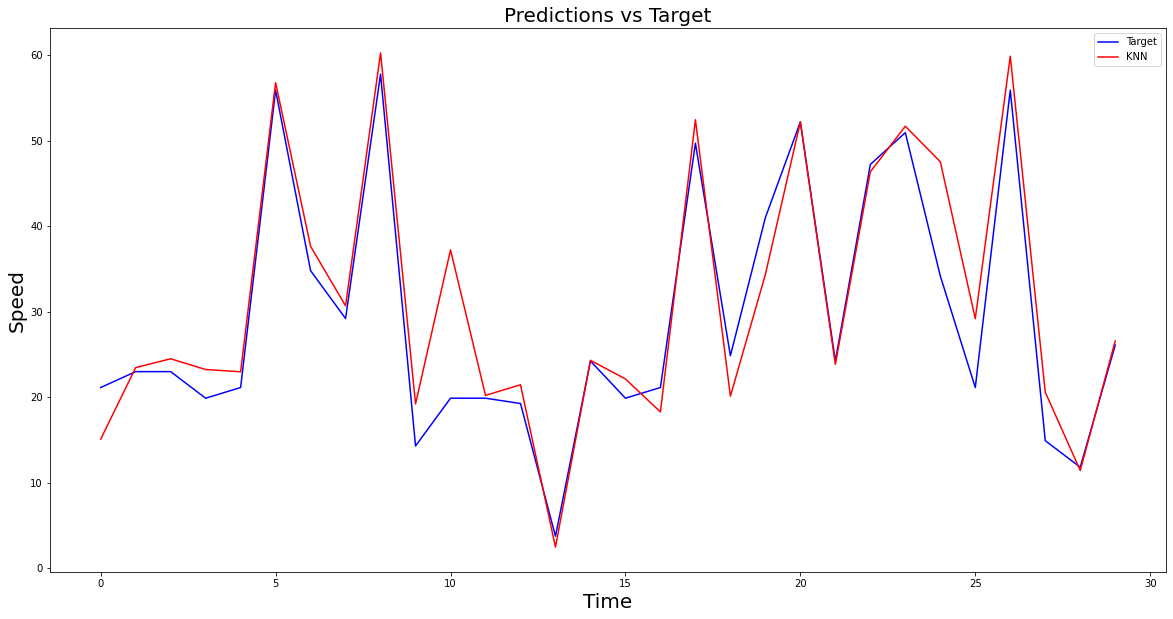

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

target = pf['t']
pred = pf['p']

e = range(0,len(pred))
print(e)
et = Time[:20]
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.plot(e, target, 'b', label='Target' )
plt.plot(e, pred, 'r',label='KNN' )
plt.xlabel('Time', fontsize=20)
plt.ylabel('Speed', fontsize=20)
plt.title('Predictions vs Target', fontsize=20)
plt.legend()
plt.figure()
plt.show()

In [25]:
mse = []
mae = []
mape = []
for i in range(len(pf['t'])):
    e1 = np.abs(np.square(np.subtract(pf['t'][i],pf['p'][i])).mean())
    e2 = np.abs(pf['p'][i] - xtest[:,0][i])
    e3 = np.abs( (pf['t'][i] - pf['p'][i])/pf['t'][i] )
    mse.append(e1)
    mae.append(e2)
    mape.append(e3)

In [26]:
import pickle
pickle_out = open("mse.pkl","wb")
pickle.dump(mse, pickle_out)
pickle_out.close()

In [27]:
pickle_out = open("mape.pkl","wb")
pickle.dump(mape, pickle_out)
pickle_out.close()

range(0, 30)


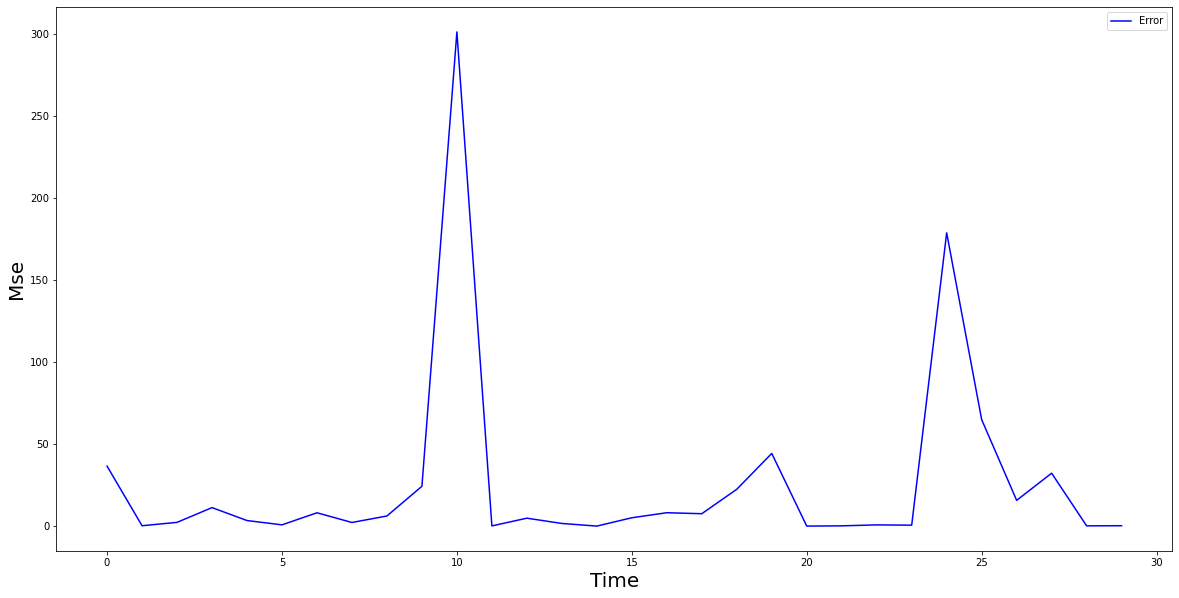

<Figure size 432x288 with 0 Axes>

In [32]:
e = range(0,len(pred))
print(e)
#et = Time[:20]
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.plot(e, mse, 'b', label='Error' )
plt.xlabel('Time', fontsize=20)
plt.ylabel('Mse', fontsize=20)
plt.title('MSE - Predictions vs Target', fontsize=20)
plt.legend()
plt.figure()
plt.show()

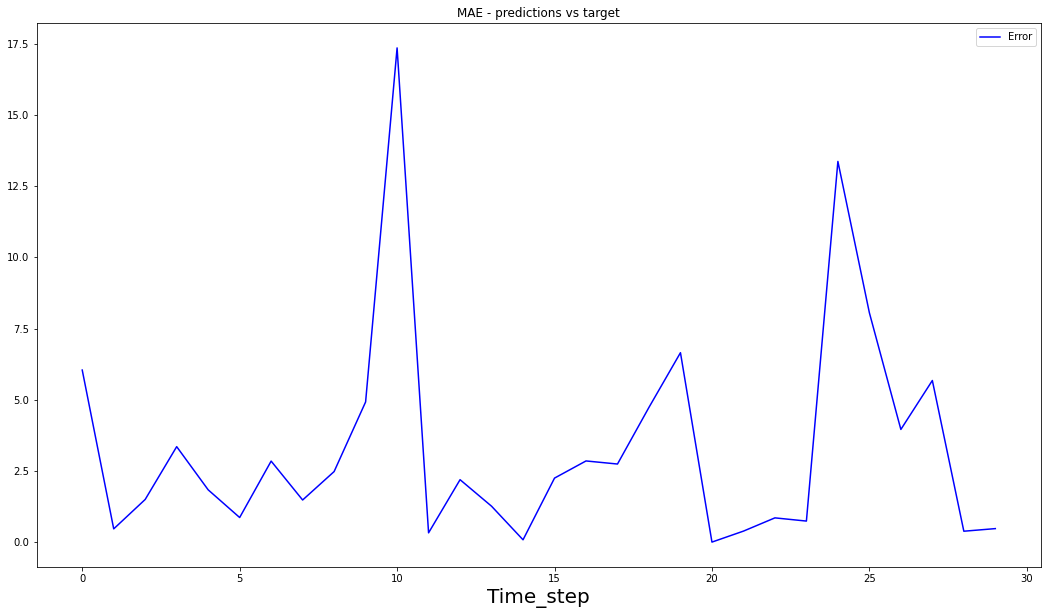

<Figure size 432x288 with 0 Axes>

In [29]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.plot(e, mae, 'b', label='Error' )
plt.xlabel('Time', fontsize=20)
plt.title('MAE - predictions vs target')
plt.legend()
plt.figure()
plt.show()

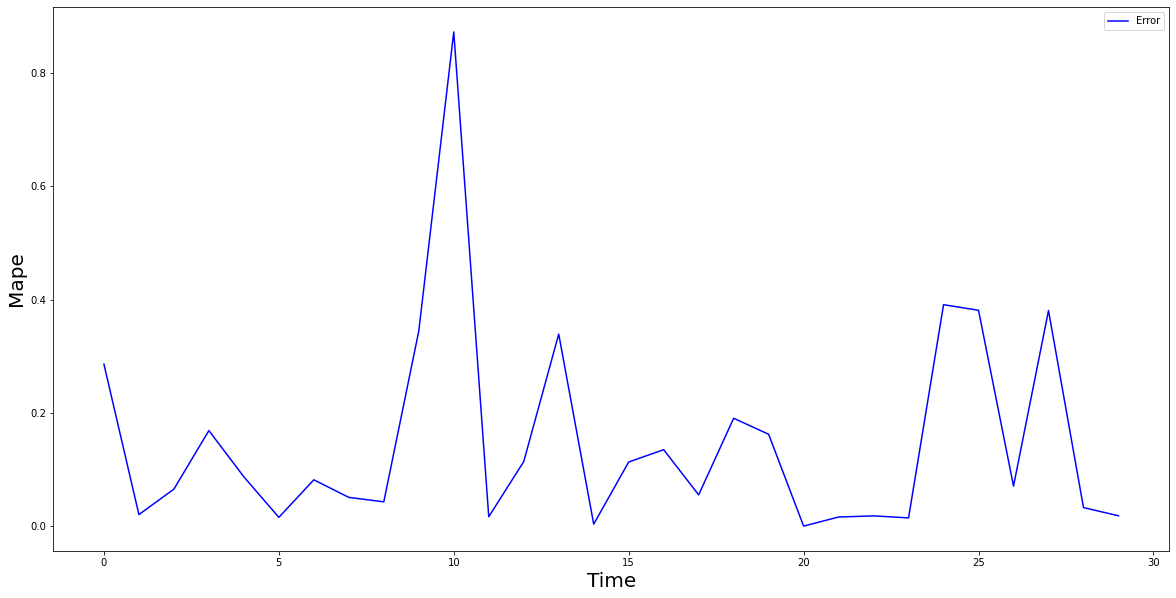

<Figure size 432x288 with 0 Axes>

In [35]:
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.plot(e, mape, 'b', label='Error' )
plt.xlabel('Time', fontsize=20)
plt.ylabel('Mape', fontsize=20)
#plt.title('MAPE - Predictions vs Target', fontsize=20)
plt.legend()
plt.figure()
plt.show()

In [31]:
mse_sum = 0
mae_sum = 0
mape_sum = 0

for i in range(len(mse)):
    mse_sum = mse_sum + mse[i]
    mae_sum = mae_sum + mae[i]
    mape_sum = mape_sum + mape[i]

rep={'mse': mse_sum/len(mse),
     'mape': mape_sum/len(mse),
     'mae': mae_sum/len(mse) 
}
df_errors = pd.DataFrame(data=rep)
df_errors


,mse,mape,mae
0,26.11261,0.149653,3.34
